# Exploration and classification of dynamical regimes

wrt. weights of ecosystem and trade income

In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools as it

## 1. ensemble aggregates

In [136]:
data = pd.read_pickle('/Users/Fritz/Desktop/Thesis/MayaSim/output/test_experiments/x11_dynamical_regimes/results/ensemble_means.pkl')

data = data.droplevel('test')

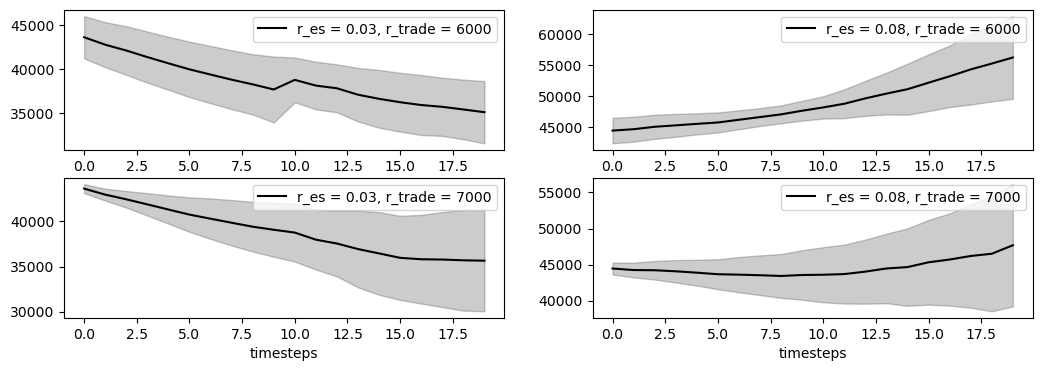

In [137]:
r_ess = [0.03, 0.08]
r_trades=[6000, 7000]

fig, ax = plt.subplots(nrows=len(r_trades), ncols=len(r_ess))
fig.set_figwidth(25/len(r_ess))
fig.set_figheight(8/len(r_trades))

for ((i, r_es), (j, r_trade)) in it.product(enumerate(r_ess), enumerate(r_trades)):
    # plot mean
    pop_mean = data.loc[(r_trade, r_es)].xs('total_population', level=1)['<ensemble_mean>']
    pop_mean.plot(ax=ax[j,i], legend=False, color='black', label=f'r_es = {r_es}, r_trade = {r_trade}')

    # plot sigma
    pop_sigma = data.loc[(r_trade, r_es)].xs('total_population', level=1)['<ensemble_sigma>']
    ax[j,i].fill_between(pop_mean.index, pop_mean + pop_sigma, pop_mean - pop_sigma, color='black', alpha=.2)

    ax[j,i].legend()

## 2. all aggregate trajectories

In [138]:
r_ess = [0.03, 0.08]
r_trades=[6000, 7000]

# load data
path = '/Users/Fritz/Desktop/Thesis/MayaSim/output/test_experiments/x11_dynamical_regimes/results/all_trjs.hd5'
with pd.HDFStore(path) as store:
    df = store.select('d1', where=f'r_trade = {r_trades} & r_es = {r_ess}', columns=['total_population'])
    df = df.droplevel('test')

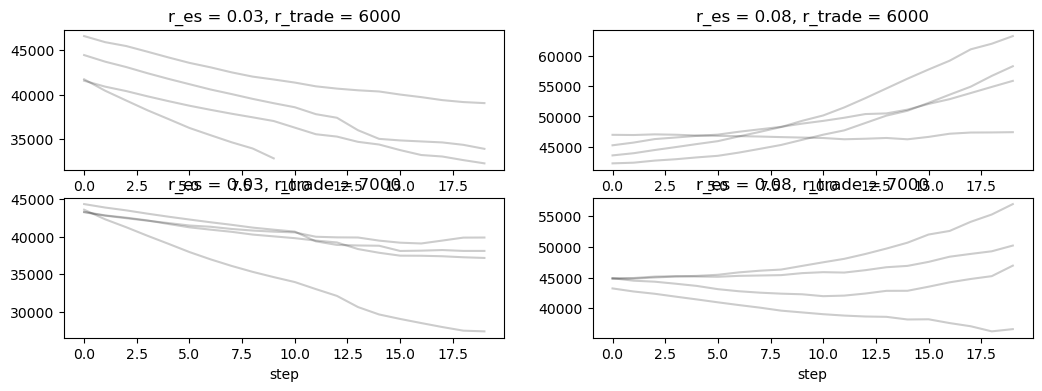

In [140]:
fig, ax = plt.subplots(nrows=len(r_trades), ncols=len(r_ess))
fig.set_figwidth(25/len(r_ess))
fig.set_figheight(8/len(r_trades))

for ((i, r_es), (j, r_trade)) in it.product(enumerate(r_ess), enumerate(r_trades)):
    runs = df.loc[(r_trade, r_es)].unstack('run_id').plot(ax=ax[j,i], legend=False, color='black', alpha=.2)
    ax[j,i].set_title(f'r_es = {r_es}, r_trade = {r_trade}')